# Quiz: Sleep and grades regression

In [1]:
#
#
# Regression and Classification programming exercises
#
#


#
#	In this exercise we will be taking a small data set and computing a linear function
#	that fits it, by hand.
#	

#	the data set

import numpy as np

sleep = [5,6,7,8,10]
scores = [65,51,75,75,86]

In [ ]:
def ssx(x):
    return sum(np.power(x,2)) - (np.power(sum(x),2))/len(x)

def ssxy(x,y):
    xy = [ a*b for a, b in zip(x,y)]
    return sum(xy) - (sum(x)*sum(y))/len(x)

$$
slope = \sum{ (x - \bar{x})*(y - \bar{y}) } * \frac{1}{ SSX( x - \bar{x} ) }
$$

In [31]:
def compute_regression(sleep,scores):

    #	First, compute the average amount of each list

    avg_sleep = np.mean(sleep)
    avg_scores = np.mean(scores)

    #	Then normalize the lists by subtracting the mean value from each entry

    normalized_sleep = sleep - avg_sleep
    normalized_scores = scores - avg_scores
    
    #	Compute the slope of the line by taking the sum over each student
    #	of the product of their normalized sleep times their normalized test score.
    #	Then divide this by the sum of squares of the normalized sleep times.

    slope = sum(normalized_sleep*normalized_scores) / ssx(normalized_sleep)

    #	Finally, We have a linear function of the form
    #	y - avg_y = slope * ( x - avg_x )
    #	Rewrite this function in the form
    #	y = m * x + b
    #	Then return the values m, b
    m = slope
    b = avg_scores - avg_sleep*m

    return m,b


if __name__=="__main__":
    m,b = compute_regression(sleep,scores)
    print "Your linear model is y={}*x+{}".format(m,b)

Your linear model is y=5.44*x+31.232


In [20]:
print sleep
print scores

[5, 6, 7, 8, 10]
[65, 51, 75, 75, 86]


In [32]:
def lm(x):
    return np.array(x)*5.44 + 31.232
lm(sleep)

array([ 58.432,  63.872,  69.312,  74.752,  85.632])

# Fitting model
$$
y = p[0] * x^2 + p[1] * x + p[2]
$$

Source:
* https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Quiz: Polynomial Regression

In [47]:
#
#	Polynomial Regression
#
#	In this exercise we will examine more complex models of test grades as a function of 
#	sleep using numpy.polyfit to determine a good relationship and incorporating more data.
#
#
#   at the end, store the coefficients of the polynomial you found in coeffs
#

import numpy as np

sleep = [5,6,7,8,10,12,16]
scores = [65,51,75,75,86,80,0]

z = np.polyfit(sleep, scores, 2)
print z

[ -1.80827085  33.59928326 -71.3685104 ]


In [52]:
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(sleep, scores, 30))

C:\Program Files\Anaconda3\envs\py27\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [54]:
import matplotlib.pyplot as plt
xp = np.linspace(2, 14, 100)

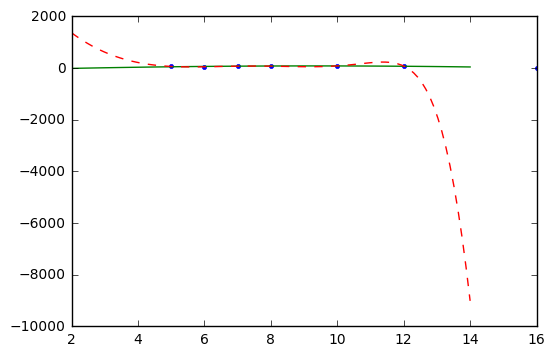

In [55]:
 _ = plt.plot(sleep, scores, '.', xp, p(xp), '-', xp, p30(xp), '--')
#plt.ylim(-2,2)
plt.show()